In [1]:
using Pkg
Pkg.activate("../")
#Pkg.instantiate()

  Activating project at `~/Documents/UCL/3x2_analytical`


In [2]:
using LinearAlgebra
using ForwardDiff
using Plots
using LimberJack
using CSV
using YAML
using NPZ
using DataFrames
using PythonCall
using Statistics
using Interpolations
using SparseArrays
sacc = pyimport("sacc");

# Judith's Chain

In [3]:
#using DelimitedFiles
#chain = readdlm("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/cosmodc2_3x2pt_fourier_lcdm.txt");

In [4]:
#chain_vals = chain[200:end, :]
#param_names = chain[1, :];

#post = chain_vals[:, 32]
#index_of_min = argmax(post)
#row_with_min = chain_vals[index_of_min, :]
#Wm = row_with_min[1]+row_with_min[2]
#Wb = row_with_min[2]
#h0 = row_with_min[5]
#ns = row_with_min[3]
#s8 = row_with_min[29]
#best_params = [Wm, Wb, h0, s8, ns]
#print(best_params)

#nuisances = Dict(
#    "lens_0_b" => row_with_min[13],
#    "lens_1_b" => row_with_min[14],
#    "lens_2_b" => row_with_min[15],
#    "lens_3_b" => row_with_min[16],
#    "lens_4_b" => row_with_min[17],
#    "source_0_m" => row_with_min[8],
#    "source_1_m" => row_with_min[9],
#    "source_2_m" => row_with_min[10],
#    "source_3_m" => row_with_min[11],
#    "source_4_m" => row_with_min[12])

In [5]:
function make_Cmod(m, model)
    T = ForwardDiff.jacobian(model, zeros(m))
    return T * T'
end

make_Cmod (generic function with 1 method)

## Data

In [6]:
method = "bpz"
sacc_path = "../data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc"
yaml_path = "../data/CosmoDC2/gcgc_gcwl_wlwl_aggresive.yml"
nz_path = string("../data/CosmoDC2/image_gp_", method, "_priors/")

sacc_file = sacc.Sacc().load_fits(sacc_path)
yaml_file = YAML.load_file(yaml_path)

nz_lens_0 = npzread(string(nz_path, "gp_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "gp_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "gp_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "gp_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "gp_lens_4.npz"))
nz_source_0 = npzread(string(nz_path, "gp_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "gp_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "gp_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "gp_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "gp_source_4.npz"))

zs_k0, nz_k0 = nz_lens_0["z"], nz_lens_0["dndz"]
zs_k1, nz_k1 = nz_lens_1["z"], nz_lens_1["dndz"]
zs_k2, nz_k2 = nz_lens_2["z"], nz_lens_2["dndz"]
zs_k3, nz_k3 = nz_lens_3["z"], nz_lens_3["dndz"]
zs_k4, nz_k4 = nz_lens_4["z"], nz_lens_4["dndz"]
zs_k5, nz_k5 = nz_source_0["z"], nz_source_0["dndz"]
zs_k6, nz_k6 = nz_source_1["z"], nz_source_1["dndz"]
zs_k7, nz_k7 = nz_source_2["z"], nz_source_2["dndz"]
zs_k8, nz_k8 = nz_source_3["z"], nz_source_3["dndz"]
zs_k9, nz_k9 = nz_source_4["z"], nz_source_4["dndz"]

mu_k0 = sum(zs_k0 .* nz_k0) / sum(nz_k0)
mu_k1 = sum(zs_k1 .* nz_k1) / sum(nz_k1)
mu_k2 = sum(zs_k2 .* nz_k2) / sum(nz_k2)
mu_k3 = sum(zs_k3 .* nz_k3) / sum(nz_k3)
mu_k4 = sum(zs_k4 .* nz_k4) / sum(nz_k4)
mu_k5 = sum(zs_k5 .* nz_k5) / sum(nz_k5)
mu_k6 = sum(zs_k6 .* nz_k6) / sum(nz_k6)
mu_k7 = sum(zs_k7 .* nz_k7) / sum(nz_k7)
mu_k8 = sum(zs_k8 .* nz_k8) / sum(nz_k8)
mu_k9 = sum(zs_k9 .* nz_k9) / sum(nz_k9)

meta_3x2, files_3x2 = make_data(sacc_file, yaml_file;
    nz_lens_0=nz_lens_0,
    nz_lens_1=nz_lens_1,
    nz_lens_2=nz_lens_2,
    nz_lens_3=nz_lens_3,
    nz_lens_4=nz_lens_4,
    nz_source_0=nz_source_0,
    nz_source_1=nz_source_1,
    nz_source_2=nz_source_2,
    nz_source_3=nz_source_3,
    nz_source_4=nz_source_4)

meta_3x2.types = [ 
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_shear", 
    "galaxy_shear", 
    "galaxy_shear",
    "galaxy_shear",
    "galaxy_shear"]

lens_0 lens_0 8
lens_1 lens_1 9
lens_2 lens_2 10
lens_3 lens_3 11
lens_4 lens_4 11
source_0 lens_0 8
source_0 lens_1 9
source_0 lens_2 10
source_0 lens_3 11
source_0 lens_4 11
source_1 lens_0 8
source_1 lens_1 9
source_1 lens_2 10
source_1 lens_3 11
source_1 lens_4 11
source_2 lens_0 8
source_2 lens_1 9
source_2 lens_2 10
source_2 lens_3 11
source_2 lens_4 11
source_3 lens_0 8
source_3 lens_1 9
source_3 lens_2 10
source_3 lens_3 11
source_3 lens_4 11
source_4 lens_0 8
source_4 lens_1 9
source_4 lens_2 10
source_4 lens_3 11
source_4 lens_4 11
source_0 source_0 14
source_1 source_0 14
source_1 source_1 14
source_2 source_0 14
source_2 source_1 14
source_2 source_2 14
source_3 source_0 14
source_3 source_1 14
source_3 source_2 14
source_3 source_3 14
source_4 source_0 14
source_4 source_1 14
source_4 source_2 14
source_4 source_3 14
source_4 source_4 14
using custom nz for nz_source_0
using custom nz for nz_source_1
using custom nz for nz_source_2
using custom nz for nz_source_3
using cus

10-element Vector{String}:
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"

## DZ

In [7]:
dz_path = string("../data/CosmoDC2/image_dz_", method, "_priors/dz_prior.npz")
dz_prior = npzread(dz_path)
dz_mean_3x2 = dz_prior["mean"]
dz_chol_3x2 = dz_prior["chol"]

10×10 Matrix{Float64}:
 0.073482      0.0          0.0          …  0.0          0.0
 0.0678409     0.00440199   0.0             0.0          0.0
 0.0533429     0.00277415   0.0043309       0.0          0.0
 0.0514771     0.00513125   0.00211765      0.0          0.0
 0.123254     -0.000679035  0.0159639       0.0          0.0
 0.000794405   0.00101283   0.00084161   …  0.0          0.0
 0.000698336   0.000837698  0.000673307     0.0          0.0
 0.0005941     0.000715175  0.000593519     0.0          0.0
 0.000549005   0.000657695  0.00053243      9.35366e-5   0.0
 0.000499113   0.000635934  0.000520262     0.000359667  0.000243523

In [8]:
function model_dz(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_1_b=0.879118, lens_2_b=1.05894, lens_3_b=1.22145, lens_4_b=1.35065, lens_5_b=1.58909,
    A_IA=0.25179439,
    meta=meta_3x2, files=files_3x2)

    dzs = dz_mean_3x2 .+ dz_chol_3x2 * alphas
    wzs = ones(10)
    lens_0_zs   = @.((zs_k0-mu_k0)/wzs[1] + mu_k0 + dzs[1])
    lens_1_zs   = @.((zs_k1-mu_k1)/wzs[2] + mu_k1 + dzs[2])
    lens_2_zs   = @.((zs_k2-mu_k2)/wzs[3] + mu_k2 + dzs[3])
    lens_3_zs   = @.((zs_k3-mu_k3)/wzs[4] + mu_k3 + dzs[4])
    lens_4_zs   = @.((zs_k4-mu_k4)/wzs[5] + mu_k4 + dzs[5])
    source_0_zs = @.((zs_k5-mu_k5)/wzs[6] + mu_k5 + dzs[6])
    source_1_zs = @.((zs_k6-mu_k6)/wzs[7] + mu_k6 + dzs[7])
    source_2_zs = @.((zs_k7-mu_k7)/wzs[8] + mu_k7 + dzs[8])
    source_3_zs = @.((zs_k8-mu_k8)/wzs[9] + mu_k8 + dzs[9])
    source_4_zs = @.((zs_k9-mu_k9)/wzs[10] + mu_k9 + dzs[10])

    nuisances = Dict(
        "lens_1_b"    => lens_1_b,
        "lens_2_b"    => lens_2_b,
        "lens_3_b"    => lens_3_b,
        "lens_4_b"    => lens_4_b,
        "lens_5_b"    => lens_5_b,
        "lens_0_zs"   => lens_0_zs,
        "lens_1_zs"   => lens_1_zs,
        "lens_2_zs"   => lens_2_zs,
        "lens_3_zs"   => lens_3_zs,
        "lens_4_zs"   => lens_4_zs,
        "source_0_zs" => source_0_zs,
        "source_1_zs" => source_1_zs,
        "source_2_zs" => source_2_zs,
        "source_3_zs" => source_3_zs,
        "source_4_zs" => source_4_zs,
        "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [9]:
Cmod_dz = make_Cmod(10, model_dz);

## WZDZ

In [10]:
wzdz_path = string("../data/CosmoDC2/image_wzdz_", method, "_priors/wzdz_prior.npz")
wzdz_prior = npzread(wzdz_path)
wzdz_mean_3x2 = wzdz_prior["mean"] 
wzdz_chol_3x2 = wzdz_prior["chol"]

20×20 Matrix{Float64}:
  0.073482      0.0           0.0          …  0.0          0.0
  0.090385      0.0163551     0.0             0.0          0.0
  0.0678409    -0.00217081    0.0038295       0.0          0.0
  0.0715285     0.00878478   -0.0166882       0.0          0.0
  0.0533429    -0.00490762    0.000406907     0.0          0.0
  0.125534     -0.003725     -0.107768     …  0.0          0.0
  0.0514771    -0.00446889    0.00336508      0.0          0.0
  0.0216091    -0.0119169    -0.0400412       0.0          0.0
  0.123254     -0.0132118    -0.00826985      0.0          0.0
  0.0506982    -0.0125975    -0.0447845       0.0          0.0
  0.000794405  -0.000911369   0.000647623  …  0.0          0.0
  0.00130355   -0.00185029    0.000827397     0.0          0.0
  0.000698336  -0.000720433   0.00055454      0.0          0.0
 -0.00182776    0.00120099   -0.0012173       0.0          0.0
  0.0005941    -0.000635604   0.000461788     0.0          0.0
 -0.000804854   0.000654059  -0.

In [11]:
function model_wzdz(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_1_b=0.879118, lens_2_b=1.05894, lens_3_b=1.22145, lens_4_b=1.35065, lens_5_b=1.58909,
    A_IA=0.25179439,
    meta=meta_3x2, files=files_3x2)

    SnWs = wzdz_mean_3x2 .+ wzdz_chol_3x2 * alphas
    dzs = [SnWs[1], SnWs[3], SnWs[5], SnWs[7], SnWs[9],
           SnWs[11], SnWs[13], SnWs[15], SnWs[17], SnWs[19]]
    wzs = [SnWs[2], SnWs[4], SnWs[6], SnWs[8], SnWs[10],
           SnWs[12], SnWs[14], SnWs[16], SnWs[18], SnWs[20]]
    lens_0_zs   = @.((zs_k0-mu_k0)/wzs[1] + dzs[1]/wzs[1] + mu_k0)
    lens_1_zs   = @.((zs_k1-mu_k1)/wzs[2] + dzs[2]/wzs[2] + mu_k1)
    lens_2_zs   = @.((zs_k2-mu_k2)/wzs[3] + dzs[3]/wzs[3] + mu_k2)
    lens_3_zs   = @.((zs_k3-mu_k3)/wzs[4] + dzs[4]/wzs[4] + mu_k3)
    lens_4_zs   = @.((zs_k4-mu_k4)/wzs[5] + dzs[5]/wzs[5] + mu_k4)
    source_0_zs = @.((zs_k5-mu_k5)/wzs[6] + dzs[6]/wzs[6] + mu_k5)
    source_1_zs = @.((zs_k6-mu_k6)/wzs[7] + dzs[7]/wzs[7] + mu_k6)
    source_2_zs = @.((zs_k7-mu_k7)/wzs[8] + dzs[8]/wzs[8] + mu_k7)
    source_3_zs = @.((zs_k8-mu_k8)/wzs[9] + dzs[9]/wzs[9] + mu_k8)
    source_4_zs = @.((zs_k9-mu_k9)/wzs[10] + dzs[10]/wzs[10] + mu_k9)

    nuisances = Dict(
        "lens_1_b"    => lens_1_b,
        "lens_2_b"    => lens_2_b,
        "lens_3_b"    => lens_3_b,
        "lens_4_b"    => lens_4_b,
        "lens_5_b"    => lens_5_b,
        "lens_0_zs"   => lens_0_zs,
        "lens_1_zs"   => lens_1_zs,
        "lens_2_zs"   => lens_2_zs,
        "lens_3_zs"   => lens_3_zs,
        "lens_4_zs"   => lens_4_zs,
        "source_0_zs" => source_0_zs,
        "source_1_zs" => source_1_zs,
        "source_2_zs" => source_2_zs,
        "source_3_zs" => source_3_zs,
        "source_4_zs" => source_4_zs,
        "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [12]:
Cmod_wzdz = make_Cmod(20, model_wzdz);

## PCA

In [13]:
nz_path = string("../data/CosmoDC2/image_PCA_", method, "_priors/")
nz_lens_0 = npzread(string(nz_path, "PCA_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "PCA_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "PCA_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "PCA_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "PCA_lens_4.npz"))
nz_source_0 = npzread(string(nz_path, "PCA_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "PCA_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "PCA_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "PCA_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "PCA_source_4.npz"))

zs_k0, nz_k0 = nz_lens_0["z"], nz_lens_0["dndz"]
zs_k1, nz_k1 = nz_lens_1["z"], nz_lens_1["dndz"]
zs_k2, nz_k2 = nz_lens_2["z"], nz_lens_2["dndz"]
zs_k3, nz_k3 = nz_lens_3["z"], nz_lens_3["dndz"]
zs_k4, nz_k4 = nz_lens_4["z"], nz_lens_4["dndz"]
zs_k5, nz_k5 = nz_source_0["z"], nz_source_0["dndz"]
zs_k6, nz_k6 = nz_source_1["z"], nz_source_1["dndz"]
zs_k7, nz_k7 = nz_source_2["z"], nz_source_2["dndz"]
zs_k8, nz_k8 = nz_source_3["z"], nz_source_3["dndz"]
zs_k9, nz_k9 = nz_source_4["z"], nz_source_4["dndz"]

W_source_0 = nz_source_0["W"]
W_source_1 = nz_source_1["W"]
W_source_2 = nz_source_2["W"]
W_source_3 = nz_source_3["W"]
W_source_4 = nz_source_4["W"]
W_lens_0 = nz_lens_0["W"]
W_lens_1 = nz_lens_1["W"]
W_lens_2 = nz_lens_2["W"]
W_lens_3 = nz_lens_3["W"]
W_lens_4 = nz_lens_4["W"]

100×5 Matrix{Float64}:
  8.93836e-6   6.52887e-6   1.17799e-5   7.24744e-7   1.97901e-6
  1.06204e-5   9.91001e-6   1.00222e-5  -3.82715e-6   2.1188e-6
  1.61924e-5   1.3437e-5    6.19754e-6  -7.59694e-6   2.72639e-6
  1.87973e-5   1.28873e-5   5.66391e-7  -8.82908e-6   1.31171e-6
  2.06809e-5   1.06275e-5  -4.54226e-6  -6.32011e-6  -2.48756e-6
  2.26157e-5   7.69694e-6  -6.29279e-6   7.6847e-7   -6.02847e-6
  2.59034e-5   6.41658e-6  -2.69828e-6   9.60455e-6  -5.93064e-6
  2.54378e-5   5.90871e-6   4.71146e-6   1.59187e-5  -2.00566e-6
  2.56369e-5   8.53095e-6   1.44177e-5   1.81992e-5   8.62244e-7
  2.86007e-5   1.77041e-5   2.75524e-5   2.21774e-5  -3.08431e-6
  4.11765e-5   3.78948e-5   4.46602e-5   3.00637e-5  -1.33731e-5
  5.49443e-5   5.8756e-5    5.98385e-5   3.91082e-5  -2.36841e-5
  7.19263e-5   7.92029e-5   7.20429e-5   4.62775e-5  -3.11812e-5
  ⋮                                                  
 -4.26514e-6  -1.20129e-6   1.73652e-7   9.31668e-7   1.77219e-7
 -3.64478e-6  

In [14]:
function model_pca(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_1_b=0.879118, lens_2_b=1.05894, lens_3_b=1.22145, lens_4_b=1.35065, lens_5_b=1.58909,
    A_IA=0.25179439,
    meta=meta_3x2, files=files_3x2)

    alphas_source_0 = alphas[1:5]
    alphas_source_1 = alphas[6:10]
    alphas_source_2 = alphas[11:15]
    alphas_source_3 = alphas[16:20]
    alphas_source_4 = alphas[21:25]
    alphas_lens_0 = alphas[26:30]
    alphas_lens_1 = alphas[31:35]
    alphas_lens_2 = alphas[36:40]
    alphas_lens_3 = alphas[41:45]
    alphas_lens_4 = alphas[46:50]

    nz_lens_0 = nz_k0 + W_lens_0 * alphas_lens_0
    nz_lens_1 = nz_k1 + W_lens_1 * alphas_lens_1
    nz_lens_2 = nz_k2 + W_lens_2 * alphas_lens_2
    nz_lens_3 = nz_k3 + W_lens_3 * alphas_lens_3
    nz_lens_4 = nz_k4 + W_lens_4 * alphas_lens_4
    nz_source_0 = nz_k5 + W_source_0 * alphas_source_0
    nz_source_1 = nz_k6 + W_source_1 * alphas_source_1
    nz_source_2 = nz_k7 + W_source_2 * alphas_source_2
    nz_source_3 = nz_k8 + W_source_3 * alphas_source_3
    nz_source_4 = nz_k9 + W_source_4 * alphas_source_4

    nuisances = Dict(
        "lens_1_b"    => lens_1_b,
        "lens_2_b"    => lens_2_b,
        "lens_3_b"    => lens_3_b,
        "lens_4_b"    => lens_4_b,
        "lens_5_b"    => lens_5_b,
        "lens_0_nz"   => nz_lens_0,
        "lens_1_nz"   => nz_lens_1,
        "lens_2_nz"   => nz_lens_2,
        "lens_3_nz"   => nz_lens_3,
        "lens_4_nz"   => nz_lens_4,
        "source_0_nz" => nz_source_0,
        "source_1_nz" => nz_source_1,
        "source_2_nz" => nz_source_2,
        "source_3_nz" => nz_source_3,
        "source_4_nz" => nz_source_4,
        "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [15]:
Cmod_pca = make_Cmod(50, model_pca);

## GP

In [16]:
nz_path = string("../data/CosmoDC2/image_gp_", method, "_priors/")

nz_lens_0 = npzread(string(nz_path, "gp_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "gp_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "gp_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "gp_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "gp_lens_4.npz"))
nz_source_0 = npzread(string(nz_path, "gp_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "gp_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "gp_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "gp_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "gp_source_4.npz"))

zs_k0, nz_k0 = nz_lens_0["z"], nz_lens_0["dndz"]
zs_k1, nz_k1 = nz_lens_1["z"], nz_lens_1["dndz"]
zs_k2, nz_k2 = nz_lens_2["z"], nz_lens_2["dndz"]
zs_k3, nz_k3 = nz_lens_3["z"], nz_lens_3["dndz"]
zs_k4, nz_k4 = nz_lens_4["z"], nz_lens_4["dndz"]
zs_k5, nz_k5 = nz_source_0["z"], nz_source_0["dndz"]
zs_k6, nz_k6 = nz_source_1["z"], nz_source_1["dndz"]
zs_k7, nz_k7 = nz_source_2["z"], nz_source_2["dndz"]
zs_k8, nz_k8 = nz_source_3["z"], nz_source_3["dndz"]
zs_k9, nz_k9 = nz_source_4["z"], nz_source_4["dndz"]

W_source_0 = nz_source_0["W"]
W_source_1 = nz_source_1["W"]
W_source_2 = nz_source_2["W"]
W_source_3 = nz_source_3["W"]
W_source_4 = nz_source_4["W"]
W_lens_0 = nz_lens_0["W"]
W_lens_1 = nz_lens_1["W"]
W_lens_2 = nz_lens_2["W"]
W_lens_3 = nz_lens_3["W"]
W_lens_4 = nz_lens_4["W"]


100×5 Matrix{Float64}:
  1.70917e-5    1.46149e-18   1.56008e-19  -2.46137e-19  -1.79311e-19
  1.69027e-5    3.82887e-6   -2.15825e-6   -1.3991e-6     4.99044e-6
  1.77432e-5    1.06485e-5   -1.43205e-6   -1.12949e-6    9.65922e-6
  1.43022e-5    1.57099e-5    1.01973e-6   -2.88831e-7    1.05305e-5
  1.08508e-5    1.94798e-5    4.20301e-6    8.8041e-7     8.99763e-6
  8.15916e-6    2.36761e-5    6.21643e-6   -3.0976e-7     3.58241e-6
  1.0646e-5     2.71508e-5    7.26172e-6   -2.03652e-6   -4.77406e-6
  1.53984e-5    2.47621e-5    6.40354e-6   -2.78309e-6   -1.2947e-5
  2.33304e-5    2.30161e-5    3.80841e-6   -3.09853e-6   -1.98656e-5
  3.28898e-5    3.09884e-5   -6.21197e-6   -9.69747e-6   -2.9276e-5
  5.37044e-5    5.01471e-5   -1.99696e-5   -1.69546e-5   -4.38955e-5
  7.46921e-5    7.02884e-5   -3.27814e-5   -2.339e-5     -5.71153e-5
  0.000101937   8.5288e-5    -3.77361e-5   -2.00408e-5   -6.92488e-5
  ⋮                                                      
 -2.46989e-6   -3.13293

In [17]:
function nz_itp(q, nq, z)
    dq = mean(q[2:end] - q[1:end-1])
    q_range = q[1]:dq:q[end]
    nz_int = cubic_spline_interpolation(q_range, nq;
        extrapolation_bc=Line())
    return nz_int(z)
end

function model_gp(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_1_b=0.879118, lens_2_b=1.05894, lens_3_b=1.22145, lens_4_b=1.35065, lens_5_b=1.58909,
    A_IA=0.25179439,
    meta=meta_3x2, files=files_3x2)

    alphas_source_0 = alphas[1:5]
    alphas_source_1 = alphas[6:10]
    alphas_source_2 = alphas[11:15]
    alphas_source_3 = alphas[16:20]
    alphas_source_4 = alphas[21:25]
    alphas_lens_0 = alphas[26:30]
    alphas_lens_1 = alphas[31:35]
    alphas_lens_2 = alphas[36:40]
    alphas_lens_3 = alphas[41:45]
    alphas_lens_4 = alphas[46:50]

    nz_lens_0 = nz_k0 + W_lens_0 * alphas_lens_0
    nz_lens_1 = nz_k1 + W_lens_1 * alphas_lens_1
    nz_lens_2 = nz_k2 + W_lens_2 * alphas_lens_2
    nz_lens_3 = nz_k3 + W_lens_3 * alphas_lens_3
    nz_lens_4 = nz_k4 + W_lens_4 * alphas_lens_4
    nz_source_0 = nz_k5 + W_source_0 * alphas_source_0
    nz_source_1 = nz_k6 + W_source_1 * alphas_source_1
    nz_source_2 = nz_k7 + W_source_2 * alphas_source_2
    nz_source_3 = nz_k8 + W_source_3 * alphas_source_3
    nz_source_4 = nz_k9 + W_source_4 * alphas_source_4

    nuisances = Dict(
        "lens_1_b"    => lens_1_b,
        "lens_2_b"    => lens_2_b,
        "lens_3_b"    => lens_3_b,
        "lens_4_b"    => lens_4_b,
        "lens_5_b"    => lens_5_b,
        "lens_0_nz"   => nz_lens_0,
        "lens_1_nz"   => nz_lens_1,
        "lens_2_nz"   => nz_lens_2,
        "lens_3_nz"   => nz_lens_3,
        "lens_4_nz"   => nz_lens_4,
        "source_0_nz" => nz_source_0,
        "source_1_nz" => nz_source_1,
        "source_2_nz" => nz_source_2,
        "source_3_nz" => nz_source_3,
        "source_4_nz" => nz_source_4,
        "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [18]:
Cmod_gp = make_Cmod(50, model_gp);

# Comp

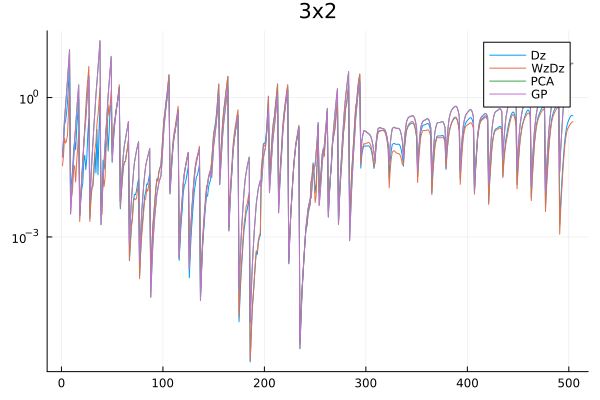

In [19]:
plot(diag(Cmod_dz) ./ diag(meta_3x2.cov), label="Dz", yscale=:log10, title="3x2")
plot!(diag(Cmod_wzdz) ./ diag(meta_3x2.cov), label="WzDz", yscale=:log10, title="3x2")
plot!(diag(Cmod_pca) ./ diag(meta_3x2.cov), label="PCA", yscale=:log10, title="3x2")
plot!(diag(Cmod_gp) ./ diag(meta_3x2.cov), label="GP", yscale=:log10, title="3x2")

## Save

In [20]:
using NPZ
npzwrite("../covs/COSMODC2/comp_covs.npz",
        Dict(
        "cov" => diag(meta_3x2.cov),
        "TT_dz" => diag(Cmod_dz),
        "TT_wzdz" => diag(Cmod_wzdz),
        "TT_pca" => diag(Cmod_pca),
        "TT_gp" => diag(Cmod_gp)))